# Cas Kaggle

L'objectiu d'aquest projecte és treballar amb la base de dades [Student Alcohol Consumption](https://www.kaggle.com/uciml/student-alcohol-consumption) i abarcar els següents apartats:
- Anàlisi dels atributs (data mining)
- Aplicar diversos mètodes d'aprenentatge
- Visualització i presentació de resultats
- Conclusions


## Introducció
El dataset esmentat a l'apartat superior tracta d'un seguit de dades d'estudiants de secundària que cursen l'assignatura de matemàtiques. Si bé el títol porta a pensar que l'objectiu final pot ser enfocat al consum d'alcohol, amb els atributs que es té també es pot tenir com a objectiu predir la nota final d'un alumne. 

A continuació es fa un breu resum dels atributs dsponibles:
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)
31. G1 - first period grade (numeric: from 0 to 20)
32. G2 - second period grade (numeric: from 0 to 20)
33. G3 - final grade (numeric: from 0 to 20, output target)


Els últims 3 atributs són, per exemple, els candidats a ser predits. A partir de la resta de dades dels alumnes, es pot intentar saber quines notes treuran. Més endevant es veurà quins atributs són més i menys importats a l'hora de fer les prediccions. 


## Data mining

Aquest primer apartat es basarà més en veure realacions entre atributs i sobretot en el títol de la base de dades. S'intentarà vuere si el consum d'alcohol està més relacionat amb un perfil en concret d'estudiant.


In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
sns.set_color_codes("pastel")
%matplotlib inline

In [6]:
db = pd.read_csv("../../data/student-por.csv")

El primer que es pot fer és veure els primers registres per fer-se una idea de com són les dades

In [7]:
db.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


És també molt útil extreure dades estadístiques dels atributs per tenir una idea de la distribució, la mitjana, si hi ha bastanta desviació, etc...
També permet veure que cap atribut té valors nuls, doncs tots tenen el mateix nombre de registres.

In [8]:
    db.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


Es pot començar analitzat atributs de forma independent. Tenint en compte del que tracta el dataset, els atributs de gènere, edat i hores d'estudi poden ser bastant significatius.

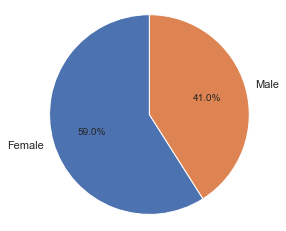

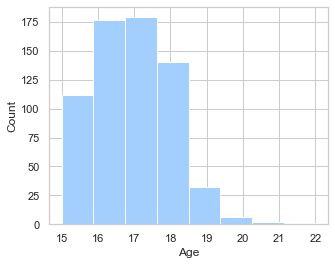

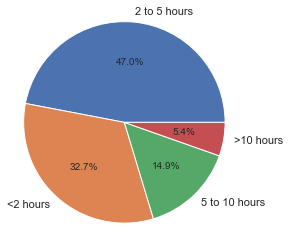

In [9]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(db['sex'].value_counts().tolist(), 
        labels=['Female', 'Male'],
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

fig, ax = plt.subplots(figsize=(5, 4))
sns.distplot(db['age'],  
             hist_kws={"alpha": 1, "color": "#a2cffe"}, 
             kde=False, bins=8)
ax = ax.set(ylabel="Count", xlabel="Age")

f, ax = plt.subplots(figsize=(4, 4))
plt.pie(db['studytime'].value_counts().tolist(), 
        labels=['2 to 5 hours', '<2 hours', '5 to 10 hours', '>10 hours'], 
        autopct='%1.1f%%', startangle=0)
axis = plt.axis('equal')

També es pot treure dades de dos atributs a la vegada. La següent imatge permet esbrinar que una escola segurament està al centre de la ciutat i l'altre a les afores. Adicionalment, també es veu que l'escola 'GB' té molts més alumnes que no pas l'altra.

<AxesSubplot:xlabel='school', ylabel='count'>

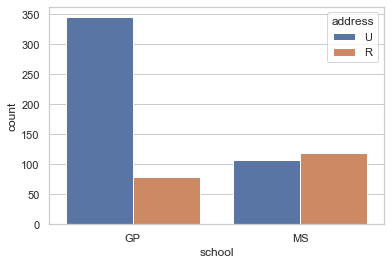

In [10]:
sns.countplot(x="school", hue ="address", data=db)



També es pot veure dades sobre el temps a arribar a l'escola. Tot i haver-hi molts menys alumnes que viuen a zones rurals, hi ha més que triguen més arribar a l'escola que no pas dels que viuen a zones urbanes.

<AxesSubplot:xlabel='address', ylabel='count'>

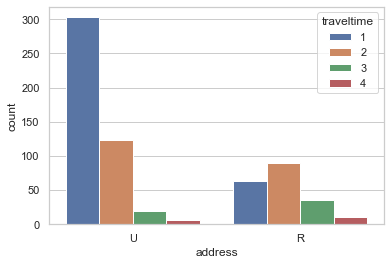

In [11]:
sns.countplot(x="address", hue ="traveltime", data=db)

Passant a dades més relacionades amb l'alcohol i el rendiment escolar, la següent imatge mostra la relació entre el consum d'alcohol els dies entre setmana i les hores d'estudi. Els resultats obtinguts no mostren gaire correlació entre ambdós atributs. 

<AxesSubplot:xlabel='studytime', ylabel='count'>

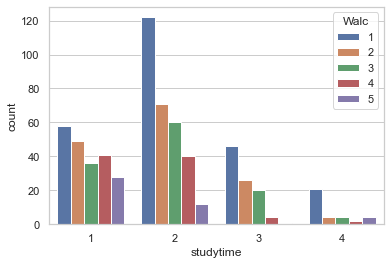

In [12]:
sns.countplot(x="studytime", hue ="Walc", data=db)

També es poden trobar algunes dades curioses. La següent imatge mostra la relació entre el consum d'alcohol entre setmana i la salut dels alumnes, separats per gènere. Mentre que la salud dels homes no es veu influenciada pel consum d'alcohol, amb les dones no passa el mateix. El fet curiós és que a més consum d'alcohol, més bona salut tenen les dones.

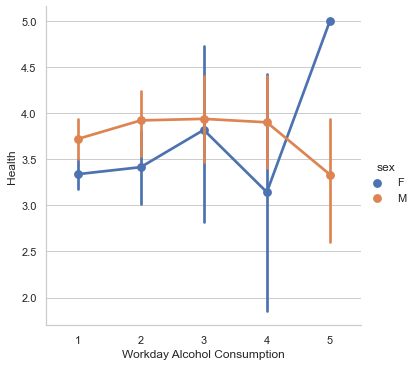

In [13]:
plot2 = sns.factorplot(x="Dalc", y="health", hue="sex", data=db)
plot2.set(ylabel="Health", xlabel="Workday Alcohol Consumption")

Com a gràfic que s'apropa encara més a l'objectiu, es pot mirar de relacionar el consum d'alcohol amb les notes. Ara sí sembla que es veu una relació més bona entre els dos atributs. Aquesta gràfica si més no pot enganyar.

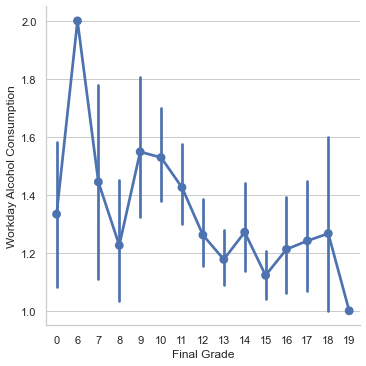

In [60]:
plot2 = sns.factorplot(x="G3", y="Dalc", data=db)
plot2.set(ylabel="Workday Alcohol Consumption", xlabel="Final Grade")

Fent un Scatter Plot es veu més bé que no hi ha la relació que anteriorment semblava que hi havia. El pic de consum d'alcohol amb nota de 6 anterior és pel fet que només hi ha una sola mostra. Ara es veu més clarament que pràcticament no hi ha correlació entre els dos atributs. Tant les notes altes com les baixes, tenen tots els perfils de consum d'alcohol.

<AxesSubplot:xlabel='G3', ylabel='Walc'>

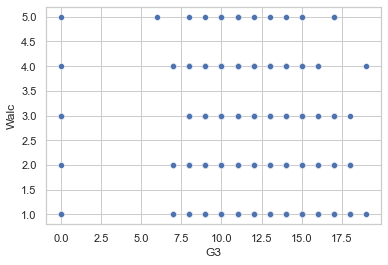

In [62]:
sns.scatterplot(data=db, x="G3", y="Walc")

## Prediccions
En aquest apartat s'aplicaran un seguir de mètodes d'aprenentatge per fer prediccions. Com a objectiu s'intentarà predir l'atribut 'Final Grade'.

### Codificació d'atributs
Un dels primers pasos és desfer-se dels atributs amb dades categòriques en format string. Per fer-ho s'utilitza un encoder que assigna un número a cada valor. A la taula inferior es veu que els atributs categòrics, com per exemple 'Mjob', ara tenen els valors codificats en números.

In [15]:
from sklearn.preprocessing import LabelEncoder
db = pd.read_csv("../../data/student-por.csv")
le = LabelEncoder()
for c in db.columns:
        if db.dtypes[c] == object:
            le.fit(db[c].astype(str))
            db[c] = le.transform(db[c].astype(str))
        
db.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13


### Outliers
Una altra manera de preprocessar les dades és detectar els outliers i, en cas d'haver-hi, corregir-los.
Es poden solucionar de 2 maneres:
1. Omplir el seu valor amb la mitjana
2. Esborrar el registre

Normalment, quan hi ha només un o dos atrbut amb outliers a un registre, aquests s'omplem amb el valor de la mitjana de l'atribut en qüestió. 
En canvi, les mostres que tenen bastants atributs amb outliers són eliminades directament.

In [16]:
from collections import Counter

def detectOutliers(df, atributs, maxOutliers):
    # maxOutliers és el nombre màxim d'outliers permesos per mostra

    indexsOutliers = []

    # iterem sobre tots els atributs
    for atr in atributs:
        # primer quartil
        Q1 = np.percentile(df[atr], 25)
        # tercer quartil
        Q3 = np.percentile(df[atr], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # zona de tall
        cutOff = 1.5 * IQR

        # Busquem els indexs dels registres fora de la zona de tall
        indexsOutliersAtr = df[(df[atr] < Q1 - cutOff) | (df[atr] > Q3 + cutOff)].index

        # Els guardem a la llista general
        indexsOutliers.extend(indexsOutliersAtr)

    # contem quantes vegades ha aparegut cada índex i seleccinem els que sobrepasen el límit especificat
    indexsOutliers = Counter(indexsOutliers)
    indexsDrop = list(k for k, v in indexsOutliers.items() if v > maxOutliers)

    return indexsDrop

def deleteRowsByIndex(df, indexs):
    rows = df.index[indexs]
    df.drop(rows, inplace=True)
    return df

db.loc[detectOutliers(db,["age","Dalc","Walc","absences"], 0)]
db = deleteRowsByIndex(db, detectOutliers(db,["age","Dalc","Walc","absences"], 0))


### Separació de dades
El següent pas és separar les mostres entre la X i la Y. Per assegurar-nos que les mètriques dels models són correctes, s'utilitzarà la tècnica anomenada cross validation. Per tant, també és necessari tenir un KFold únic per tots els cross validations. 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
y = db['G3']
x = db.drop(columns='G3')
kf = KFold(n_splits=5, random_state=0, shuffle=True)

### Escalat de dades
També és recomanable escalar les dades per tal que tots els atributs tinguin el mateix pes durant la regressió. Com que s'estan canviant els valors, cal tenir en compte de no modificar la Y, és a dir, el valor a predir.

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# scaler = MinMaxScaler().fit(x)
# scaler = StandardScaler().fit(x)
# x = pd.DataFrame(scaler.transform(x), index=x.index, columns=x.columns)

### Primers aprenentatges i mètrica a utilitzar
A continuació es farà la predicció amb un seguit de models sense dedicar temps als paràmetres. Simplement servirà per veure si hi ha una homogenietat entre els resultats. Com a mètrica a utilitzar, al haver de predir un número i no pas classificar entre classes, ens fixarem en el Mean Squared Error. 

No obstant, les mètriques utilitzades per Sklearn funcionen quelcom diferent. Quan s'ha d'especificar un valor per scoring, el que hi ha disponible és 'neg_mean_squared_error', que bàsicament dona el resultat en negatiu. 
La raó és la comentada [aquí](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values). Com a resum, hi ha la convenció que els valors grans són millors que els petits. Les mètriques que mesuren distàncies, com per exemple Mean Squared Error, estan disponibles com a 'neg_mean_squared_error' i retornen el valor negat de la mètrica.

Com a punt final respecte la mètrica, els resultats es mostraran directament fent l'arrel quadrada i adaptant-los a notes avaluades sobre 10. És a dir, el valor mostrat serà exactament la distància absoluta a la que es queden les prediccions si avaluem les notes sobre 10.

Decision Tree Regressor: 0.7809670842681601
Ridge: 0.5810559548998069
Linear Regression: 0.5815476529448929
Lasso: 0.6006076877008069
LinearSVR: 0.6078898015631493
XGBRegressor: 0.6394769231096677


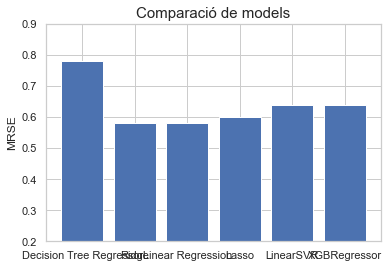

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import LinearSVR
import xgboost as xgb

from sklearn.model_selection import cross_val_score

names = ['Decision Tree Regressor','Ridge', 'Linear Regression',  'Lasso', 'LinearSVR', 'XGBRegressor']

clf_list = [DecisionTreeRegressor(random_state=0),
            Ridge(),
            LinearRegression(),
            Lasso(), 
            LinearSVR(),
            xgb.XGBRegressor()]

scores = []
for name, clf in zip(names, clf_list):
    print(name, end=': ')
    print(abs(cross_val_score(clf, x, y, cv=kf, scoring='neg_root_mean_squared_error').mean()/2))
    scores.append(abs(cross_val_score(clf, x, y, cv=kf, scoring='neg_root_mean_squared_error').mean()/2))

x_pos = [i for i, _ in enumerate (names)]
plt.bar(x_pos, scores)
plt.ylabel('MRSE')
plt.title('Comparació de models', fontsize=15)
plt.xticks(x_pos, names)
plt.ylim([0.2, 0.9])
plt.show()


#### Mitjana i desviació estàndard
Els resultats semblen ser molt bons. El problema, però, és que de moment només s'utilitza la mitjana de les prediccions, però en cap moment s'està mirant la desviació estàndard. 
Els següent resultats mostren tant la mitjana com la desviació estàndard del MRSE dels resultats anteriors.

Quan la desviació estàndard és petita, significa que les prediccions són més estables i solen donar uns valors semblants. En canvi, quan és alta les prediccions no són tant estables i una pot ser molt bona i una altra molt dolenta. Als resultats obtinguts totes les desviacions estàndards es poden considerar baixes i, per tant, bones.

Es poden donar casos, però, on la mitjana de la mètrica utilitzada sigui considerada bona, però hi hagi molta desviació estàndard. Aquestes situacions no són desitjables doncs no et pots fiar que totes les prediccions seran d'acord amb la mitjana.

In [20]:
for name, clf in zip(names, clf_list):
    print(name, end=': ')
    notes = (abs(cross_val_score(clf, x, y, cv=kf, scoring='neg_root_mean_squared_error')))
    print('MRSE: ', notes.mean()/2)
    print('Desviació estàndard: ', np.std(notes)/2, '\n')

Decision Tree Regressor: MRSE:  0.7809670842681601
Desviació estàndard:  0.07730632335989951 

Ridge: MRSE:  0.5810559548998069
Desviació estàndard:  0.09398739817977715 

Linear Regression: MRSE:  0.5815476529448929
Desviació estàndard:  0.09380993334664992 

Lasso: MRSE:  0.6006076877008069
Desviació estàndard:  0.09688894310957402 

LinearSVR: MRSE:  0.6041343292837101
Desviació estàndard:  0.0926697771308176 

XGBRegressor: MRSE:  0.6394769231096677
Desviació estàndard:  0.11777454182847932 



### Visualització gràfica de les prediccions

A continuació es mostrarà gràficament les prediccions i el valor real, per veure-ho més fàcilment.

Els següents gràfics permeten veure l'error de cada una de les prediccions. L'eix X és el valor real de la nota, mentre que l'eix Y és el valor que s'ha prediït. La línia horitzontal ens permet veure la distància vertical que hi ha entre el valor de l'eix Y i el que hauria de tenir. Es podria utilitzar per calcular de forma manual l'error quadràtic.


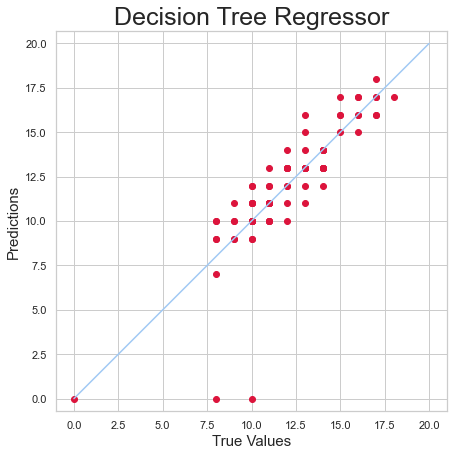

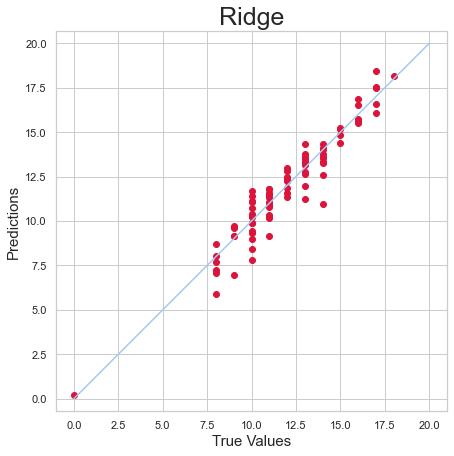

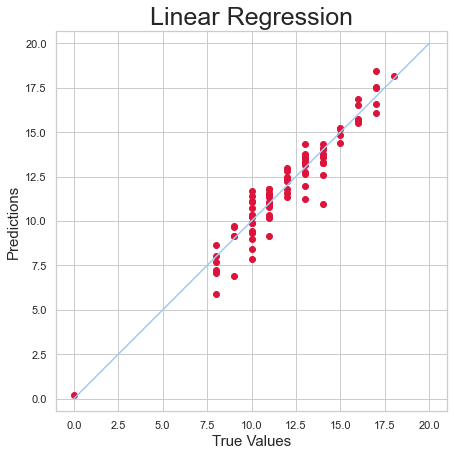

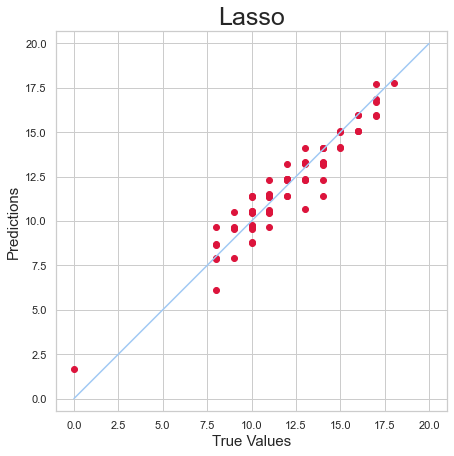

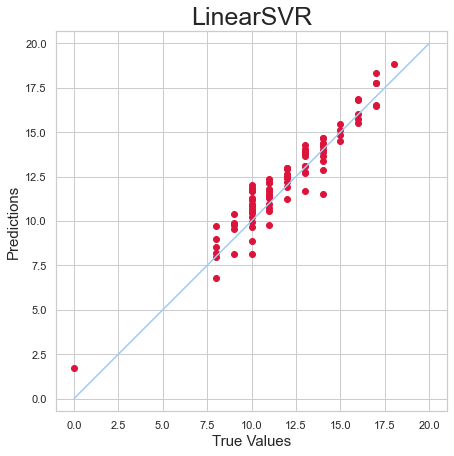

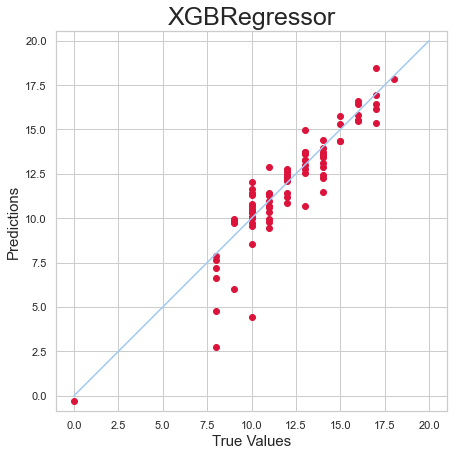

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=9)

for name, clf in zip(names, clf_list):  
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    plt.figure(figsize=(7,7))
    plt.scatter(y_test, y_pred, c='crimson')
    p1 = 20
    p2 = 0
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.title(name, fontsize=25)
    plt.axis('equal')
plt.show()

### Buscant nombre de components òptim

Utilitzant el Principal Compoment Analysis es pot aconseguir fer combinacions entre atributs i reduir la seva dimensionalitat. Pot ser molt útil quan es té un nombre molt elevat d'atributs i són redundants entre ells. D'aquesta manera, al tenir menys dimensions, la complexitat computacional baixa.

Veient els resultats de la gràfica anterior, estem davant d'una reducció de dimensinalitat satisfactòria. No només s'aconsegueix reduir el MSRE fins a 0.56, sinó que el nombre de dimensions baixa fins a 12 per obtenir el millor resultat. 

Millor resultat: 0.5679591573420801 ,  n_components = 12


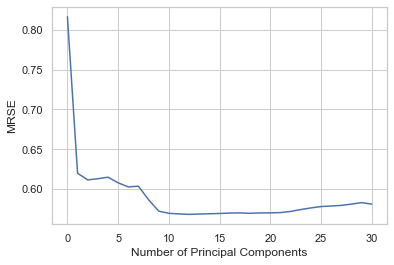

In [68]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold



regr = LinearRegression()
mse = []

for i in np.arange(1, x.shape[1]):
    pca = PCA(n_components=i)
    X_reduced = pca.fit_transform(x)
    score = -1*model_selection.cross_val_score(regr,
               X_reduced, y, cv=kf, scoring='neg_root_mean_squared_error').mean()
    mse.append(score/2)
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MRSE')

bestNComponents = np.argmin(mse)
print("Millor resultat:", min(mse),",  n_components =", bestNComponents)

import pickle
model = LinearRegression()
X_reduced = PCA(n_components=bestNComponents).fit_transform(x)
model.fit(X_reduced, y)
filename = 'linearRegressionPCA'+ str(bestNComponents)+'Components.sav'
pickle.dump(model, open(filename, 'wb'))

### Hyperparameter Search

Fins ara s'ha estat fent proves amb models sense configurar. Moltes vegades, els millor resultats no s'aconsegueixen triant un model o un altre, sinó triant els hiperparàmetres correctes. 
Són els encarregats de modificar el comportament (velocitat, estructura, rendiment, prediccions) dels models. 
Un bon exemple és el learning rate. Quan és molt gran, l’aprenentatge no és suficientment sensitiu. Quan és molt petit, l’aprenentatge és tant sensitiu que el temps d’execució pot resultar sent infinit.

La tasca de trobar els paràmetres correctes és molt feixuga i comporta molt temps. Si bé, tenint un coneixement previ dels models, pot ser útil per aproximar el valor d’un paràmetre, la gran majoria de vegades es necessita recórrer a mètodes que provin un seguit de paràmetres, extreguin les mètriques de rendiment i es quedin amb el millor model.

Per aconseguir-ho, doncs, es pot aplicar les següents tècniques:

- Grid Search: És la manera més bàsica de fer “hyperparameter tuning”, basant-se en fer totes les combinacions possibles d’un conjunt de paràmetres especificats prèviament.

- Random Search: En comptes d’especificar els valors que podrà agafar cada paràmetre, s’especifica un interval. Per cada iteració s’agafa un valor de l’interval de cada paràmetre i es fa la prova. 

- Bayesian Search: Aquest mètodes es basa en un principi diferent. Cada iteració optimitza els valors dels paràmetres basant-se en amb les mètriques que l’anterior iteració. És útil quan es té un una gran quantitat de dades, l’aprenentatge és lent i es necessita minimitzar el “tuning time”.

Quan es tenen recursos limitats, per exemple un ordinador personal, és recomanable provar el “Bayesian”.  Al seleccionar els valors de forma informada prioritzant els que semblen més prometedors, aquest mètode pot trobar els millors paràmetres en poc temps.

#### Primera cerca pel Decision Tree Regressor
Per fer la prova s'utilitzarà  el model que ha donat resultats més dolents anteriorment, el Decision Tree Regressor, així es veurà fins a quin punt una bona elecció de paràmetres afecta les prediccions.

In [65]:
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV

parameters={"splitter":["best","random"],
            "max_depth" : [None,1,3,7,12,16,21,25,30],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.0,0.1,0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

reg_decision_model=DecisionTreeRegressor()
kf2 = KFold(n_splits=3, random_state=0, shuffle=True)
tuning_model= BayesSearchCV(reg_decision_model, search_spaces=parameters, n_jobs=-1, scoring='neg_root_mean_squared_error',cv=kf2)

result = tuning_model.fit(x,y)
print('Best Hyperparameters: %s' % result.best_params_)



Best Hyperparameters: OrderedDict([('max_depth', 30), ('max_features', 'auto'), ('max_leaf_nodes', 20), ('min_samples_leaf', 4), ('min_weight_fraction_leaf', 0.0), ('splitter', 'best')])


Un cop es tenen els paràmetres suposadament òptims, s'apliquen a un nou model i es compara amb un amb paràmetres per defecte.
Es pot veure una millora molt bona.

In [71]:
clf = DecisionTreeRegressor()
clf.set_params(**result.best_params_)
res = (abs(cross_val_score(clf, x, y, cv=kf, scoring='neg_root_mean_squared_error')))
print("MILLORS PARÀMETRES")
print('RMSE: ', res.mean()/2)
print('Desviació estàndard: ', np.std(res)/2, '\n')

clf.fit(x, y)
filename='decisionTreeRegressorBestParams.sav'
pickle.dump(clf,  open(filename, 'wb'))

clf = DecisionTreeRegressor()
res = (abs(cross_val_score(clf, x, y, cv=kf, scoring='neg_root_mean_squared_error')))
print('SENSE PARÀMETRES')
print('RMSE: ', res.mean()/2)
print('Desviació estàndard: ', np.std(res)/2, '\n')

clf.fit(x, y)
filename='decisionTreeRegressorDefaultParams.sav'
pickle.dump(clf, open(filename, 'wb'))

MILLORS PARÀMETRES
RMSE:  0.689366477025574
Desviació estàndard:  0.1119338449326716 

SENSE PARÀMETRES
RMSE:  0.8617622241746782
Desviació estàndard:  0.1566308907345235 



#### Altres cerces per Ridge i Lasso
Havent vist que es tenen millores molt bones, es pot provar també a veure si també milloren els models que anteriorment ja tenien bons resultats.

In [47]:
import warnings
warnings.filterwarnings('ignore')

ridge_params = {'alpha':[90,92,94,96,98,100,102,104,106,108,110]}

reg_decision_model=Ridge()
tuning_model= BayesSearchCV(reg_decision_model, search_spaces=ridge_params, n_jobs=-1, scoring='neg_root_mean_squared_error',cv=kf2)

result = tuning_model.fit(x,y)
print('RIDGE')
print('Best Hyperparameters: %s' % result.best_params_)

clf = Ridge()
clf.set_params(**result.best_params_)
res = (abs(cross_val_score(clf, x, y, cv=kf, scoring='neg_root_mean_squared_error')))
print("MILLORS PARÀMETRES")
print('RMSE: ', res.mean()/2)
print('Desviació estàndard: ', np.std(res)/2, '\n')

clf = Ridge()
res = (abs(cross_val_score(clf, x, y, cv=kf, scoring='neg_root_mean_squared_error')))
print('SENSE PARÀMETRES')
print('RMSE: ', res.mean()/2)
print('Desviació estàndard: ', np.std(res)/2, '\n')

RIDGE
Best Hyperparameters: OrderedDict([('alpha', 104)])
MILLORS PARÀMETRES
RMSE:  0.5693485192969591
Desviació estàndard:  0.10418762574818498 

SENSE PARÀMETRES
RMSE:  0.5810559548998069
Desviació estàndard:  0.09398739817977715 



In [48]:
lasso_params = {'alpha':[0, 0.0001, 0.001, 0.01, 0.1, 1]}

reg_decision_model=Lasso()
tuning_model= BayesSearchCV(reg_decision_model, search_spaces=lasso_params, n_jobs=-1, scoring='neg_root_mean_squared_error',cv=kf2)

result = tuning_model.fit(x,y)
print('LASSO')
print('Best Hyperparameters: %s' % result.best_params_)

clf = Lasso()
clf.set_params(**result.best_params_)
res = (abs(cross_val_score(clf, x, y, cv=kf, scoring='neg_root_mean_squared_error')))
print("MILLORS PARÀMETRES")
print('RMSE: ', res.mean()/2)
print('Desviació estàndard: ', np.std(res)/2, '\n')

clf = Lasso()
res = (abs(cross_val_score(clf, x, y, cv=kf, scoring='neg_root_mean_squared_error')))
print('SENSE PARÀMETRES')
print('RMSE: ', res.mean()/2)
print('Desviació estàndard: ', np.std(res)/2, '\n')

LASSO
Best Hyperparameters: OrderedDict([('alpha', 0.1)])
MILLORS PARÀMETRES
RMSE:  0.5714961449863785
Desviació estàndard:  0.09930701375319313 

SENSE PARÀMETRES
RMSE:  0.6006076877008069
Desviació estàndard:  0.09688894310957402 



In [49]:
svr_params = {'C':[ 0.1, 1, 5, 20, 100]}

reg_decision_model=LinearSVR()
tuning_model= BayesSearchCV(reg_decision_model, search_spaces=svr_params, n_jobs=-1, scoring='neg_root_mean_squared_error',cv=kf2)

result = tuning_model.fit(x,y)
print('LinearSVR')
print('Best Hyperparameters: %s' % result.best_params_)

clf = LinearSVR()
clf.set_params(**result.best_params_)
res = (abs(cross_val_score(clf, x, y, cv=kf, scoring='neg_root_mean_squared_error')))
print("MILLORS PARÀMETRES")
print('RMSE: ', res.mean()/2)
print('Desviació estàndard: ', np.std(res)/2, '\n')

clf = LinearSVR()
res = (abs(cross_val_score(clf, x, y, cv=kf, scoring='neg_root_mean_squared_error')))
print('SENSE PARÀMETRES')
print('RMSE: ', res.mean()/2)
print('Desviació estàndard: ', np.std(res)/2, '\n')

LinearSVR
Best Hyperparameters: OrderedDict([('C', 1.0)])
MILLORS PARÀMETRES
RMSE:  0.6342979473230905
Desviació estàndard:  0.0923292351092693 

SENSE PARÀMETRES
RMSE:  0.6541497054484606
Desviació estàndard:  0.0807680413647577 



### Boosting

Una tècnica àmpliament utilitzada és la de crear Ensambles, o dit d’altra manera, un conjunt de models de Machine learning. Cada model té una predicció diferent, però entre ells es combinen per obtenir una única predicció. L’avantatge de combinar models diferents és que, al funcionar diferents, els seus errors es compensen entre ells. 

En aquest cas es fa ús del Ada Boosting. Es basa en millorar cada model de forma seqüencial posant més pes en les mostres més mal classificades pel model anterior.


In [73]:
from sklearn.ensemble import AdaBoostRegressor

regr_1 = DecisionTreeRegressor(max_depth=25)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=25), n_estimators=300)

res = (abs(cross_val_score(regr_1, x, y, cv=kf, scoring='neg_root_mean_squared_error')))
print('SENSE BOOSTING')
print('RMSE: ', res.mean()/2)
print('Desviació estàndard: ', np.std(res)/2, '\n')

res = (abs(cross_val_score(regr_2, x, y, cv=kf, scoring='neg_root_mean_squared_error')))
print('AMB BOOSTING')
print('RMSE: ', res.mean()/2)
print('Desviació estàndard: ', np.std(res)/2, '\n')

filename='AdaBoosting_DecisionTreeRegressor_defaultParams.sav'
regr_2.fit(x, y)
pickle.dump(regr_2, open(filename, 'wb'))


SENSE BOOSTING
RMSE:  0.8066535690442009
Desviació estàndard:  0.08716555899151276 

AMB BOOSTING
RMSE:  0.6251246252418314
Desviació estàndard:  0.13863333984384776 



### Hyperparameter Search + Boosting

In [74]:
from sklearn.ensemble import AdaBoostRegressor

parameters={"splitter":["best","random"],
            "max_depth" : [None,1,3,7,12,16,21,25,30],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.0,0.1,0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }




reg_decision_model=DecisionTreeRegressor()
kf2 = KFold(n_splits=3, random_state=0, shuffle=True)
tuning_model= BayesSearchCV(reg_decision_model, search_spaces=parameters, n_jobs=-1, scoring='neg_root_mean_squared_error',cv=kf2)

result = tuning_model.fit(x,y)
print('Best Hyperparameters: %s' % result.best_params_)


regr_1 = DecisionTreeRegressor()

regr2_b = DecisionTreeRegressor()
regr2_b.set_params(**result.best_params_)

regr_2 = AdaBoostRegressor(
    regr2_b, n_estimators=300)

res = (abs(cross_val_score(regr_1, x, y, cv=kf, scoring='neg_root_mean_squared_error')))
print('SENSE BOOSTING')
print('RMSE: ', res.mean()/2)
print('Desviació estàndard: ', np.std(res)/2, '\n')

res = (abs(cross_val_score(regr_2, x, y, cv=kf, scoring='neg_root_mean_squared_error')))
print('AMB BOOSTING')
print('RMSE: ', res.mean()/2)
print('Desviació estàndard: ', np.std(res)/2, '\n')

filename = 'AdaBoosting_DecisionTreeRegressor_BestParams.sav'
regr_2.fit(x, y)
pickle.dump(regr_2, open(filename, 'wb'))



Best Hyperparameters: OrderedDict([('max_depth', None), ('max_features', 'auto'), ('max_leaf_nodes', 30), ('min_samples_leaf', 5), ('min_weight_fraction_leaf', 0.0), ('splitter', 'best')])
SENSE BOOSTING
RMSE:  0.833467898476461
Desviació estàndard:  0.1383249190046223 

AMB BOOSTING
RMSE:  0.5802908816025126
Desviació estàndard:  0.1205391188039696 



## Eliminació d'atributs amb massa bias
De moment, tots els models semblen donar un molt bon resultat, però pot no ser realment així. Per sortir del dubte, podem mirar la importància de cada atribut utilitzant el Decision Tree Classifier.

Es veu clarament que més del 80% de la capacitat predictiva de l'algorisme s'aconsegueix amb, i només amb, l'atribut G2 ('Second term grade'). 

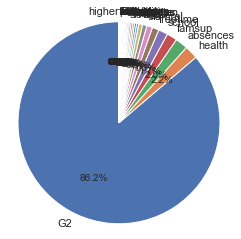

In [23]:
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
valors = []
labels = []
for f in range(x_train.shape[1]):
    valors.append(importances[indices[f]])
    labels.append(x_train.columns.values[indices[f]])
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(valors, 
        labels=labels,
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

Fent una altra prova esborrant l'atribut G2, veiem que el G1 ('First term grade') porta a un resultat similar que l'anterior.
És només quan eliminem ambdós atributs que ja tenim una importància més distribuida entre els restants.

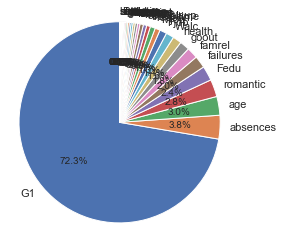

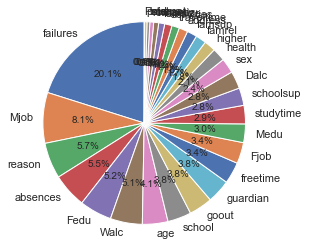

In [24]:
x_train_drop = x_train.drop(columns=['G2'])
tree = DecisionTreeRegressor()
tree.fit(x_train_drop, y_train)
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
valors = []
labels = []
for f in range(x_train_drop.shape[1]):
    valors.append(importances[indices[f]])
    labels.append(x_train_drop.columns.values[indices[f]])
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(valors, 
        labels=labels,
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

x_train_drop = x_train.drop(columns=['G1', 'G2'])
tree = DecisionTreeRegressor()
tree.fit(x_train_drop, y_train)
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
valors = []
labels = []
for f in range(x_train_drop.shape[1]):
    valors.append(importances[indices[f]])
    labels.append(x_train_drop.columns.values[indices[f]])
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(valors, 
        labels=labels,
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

La gràcia de poder predir les notes finals és fer-ho al començament del curs escolar, no quan ja es tenen les notes parcials. Fent les mateixes proves que anteiorment, però sense els atributs G2 i G1, s'obtenen els següents resultats.
Tots els models empitjoren de forma considerable. 

Decision Tree Regressor: MRSE:  1.7522094093008562
Desviació estàndard:  0.11945077847612935 

Ridge: MRSE:  1.302058757771865
Desviació estàndard:  0.11009126656837352 

Linear Regression: MRSE:  1.3027200296475303
Desviació estàndard:  0.11018233617551045 

Lasso: MRSE:  1.5608032451625733
Desviació estàndard:  0.10764873024767331 

LinearSVR: MRSE:  1.3131841030247613
Desviació estàndard:  0.12942031948647847 

XGBRegressor: MRSE:  1.413001208207769
Desviació estàndard:  0.08420855196788483 



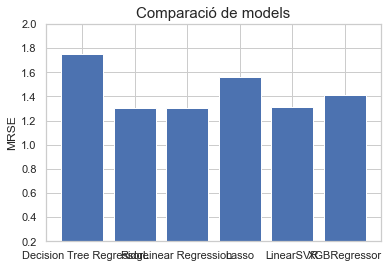

In [31]:
x_drop = x.drop(columns=['G2', 'G1'])
scores = []
for name, clf in zip(names, clf_list):
    print(name, end=': ')
    notes = abs(cross_val_score(clf, x_drop, y, cv=kf, scoring='neg_root_mean_squared_error'))
    print('MRSE: ', notes.mean()/2)
    print('Desviació estàndard: ', np.std(notes)/2, '\n')
    scores.append(notes.mean()/2)

x_pos = [i for i, _ in enumerate (names)]
plt.bar(x_pos, scores)
plt.ylabel('MRSE')
plt.title('Comparació de models', fontsize=15)
plt.xticks(x_pos, names)
plt.ylim([0.2, 2])
plt.show()

# x_train, x_test, y_train, y_test = train_test_split(x_drop, y, test_size=0.15, random_state=9)

# for name, clf in zip(names, clf_list):  
#     clf.fit(x_train, y_train)
#     y_pred = clf.predict(x_test)

#     plt.figure(figsize=(7,7))
#     plt.scatter(y_test, y_pred, c='crimson')
#     p1 = 20
#     p2 = 0
#     plt.plot([p1, p2], [p1, p2], 'b-')
#     plt.xlabel('True Values', fontsize=15)
#     plt.ylabel('Predictions', fontsize=15)
#     plt.title(name, fontsize=25)
#     plt.axis('equal')
# plt.show()

De totes formes es pot probar alguns mètodes anteriors amb l'objectiu de millorar les prediccions.

Primerament s'aplica hyperparameter search a un Decision Tree Regressor. Com era d'espererar, els resultats són millors. Tot i això, estan lluny de ser iguals als anteriors on es podia utilitzar tots els atributs.

In [32]:
from skopt import BayesSearchCV

parameters={"splitter":["best","random"],
            "max_depth" : [None,1,3,7,12,16,21,25,30],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.0,0.1,0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

reg_decision_model=DecisionTreeRegressor()
kf2 = KFold(n_splits=3, random_state=0, shuffle=True)
tuning_model= BayesSearchCV(reg_decision_model, search_spaces=parameters, n_jobs=-1, scoring='neg_root_mean_squared_error',cv=kf2)

result = tuning_model.fit(x_drop,y)
print('Best Hyperparameters: %s' % result.best_params_)

clf = DecisionTreeRegressor()
clf.set_params(**result.best_params_)
res = (abs(cross_val_score(clf, x_drop, y, cv=kf, scoring='neg_root_mean_squared_error')))
print("MILLORS PARÀMETRES")
print('RMSE: ', res.mean()/2)
print('Desviació estàndard: ', np.std(res)/2, '\n')


Best Hyperparameters: OrderedDict([('max_depth', 12), ('max_features', 'auto'), ('max_leaf_nodes', 50), ('min_samples_leaf', 6), ('min_weight_fraction_leaf', 0.1), ('splitter', 'best')])
MILLORS PARÀMETRES
RMSE:  1.3999319048069414
Desviació estàndard:  0.0825116764046014 



Fent servir mètodes de Boosting s'aconsegueix millorar encara més el resultat, fins al punt d'igualar les prediccions del Decision Tree Regressor a les del Linear Regression

In [40]:
from sklearn.ensemble import AdaBoostRegressor

clf = DecisionTreeRegressor()
regr_2 = AdaBoostRegressor(
    clf, n_estimators=300)


res = (abs(cross_val_score(regr_2, x_drop, y, cv=kf, scoring='neg_root_mean_squared_error')))
print('AMB BOOSTING')
print('RMSE: ', res.mean()/2)
print('Desviació estàndard: ', np.std(res)/2, '\n')

AMB BOOSTING
RMSE:  1.304963150676669
Desviació estàndard:  0.11853044626823779 



## Utilitzant atributs únicament relacionats amb el consum d'alcohol
Un altre objectiu del dataset és veure si el consum d'alcohol afecta al rendiment escolar dels alumnes. Es pot provar, doncs, a entrenar models utilitzant només els atributs relacionat amb el consum d'alcohol. En cas que hi hagi molta correlació entre els atributs en qüestió i la nota final, s'obtindran unes prediccions mínimament acceptables. D'altra banda, si les prediccions són molt dolentes, es podria dir que no hi ha gaire correlació com a norma general.

A continuació es mostren dos resultats. El primer és, com s'ha comentat, utilitzant atriuts només relacionats amb el consum d'alcohol. El segon és el contrari, s'utilitzen els atributs no relacionats amb el consum d'alcohol. Per ambdues proves s'ha eliminat també els atribts 'G1' i 'G2'.

Es veu que les prediccions dels primers resultats són pitjors que els segons, significant que el consum d'alcohol no afecta de forma significativa al rendiment escolar. No només això, sinó que els segons resultats són pràcticament idèntics al les prediccions on s'utilitzen tots els atributs menys 'G1' i 'G2'.

Decision Tree Regressor: MRSE:  1.6601348172914612
Desviació estàndard:  0.11799269906263107 

Ridge: MRSE:  1.549272912897224
Desviació estàndard:  0.11059283851326644 

Linear Regression: MRSE:  1.5493190164968147
Desviació estàndard:  0.1105786840430735 

Lasso: MRSE:  1.5634882068507807
Desviació estàndard:  0.10610980630015639 

LinearSVR: MRSE:  1.5580961311288035
Desviació estàndard:  0.10426708687342287 

XGBRegressor: MRSE:  1.6554330946306905
Desviació estàndard:  0.10397499474360583 



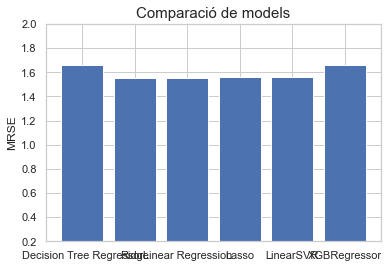

Decision Tree Regressor: MRSE:  1.7128520387958048
Desviació estàndard:  0.21344006348400993 

Ridge: MRSE:  1.302726767962087
Desviació estàndard:  0.10892705959316983 

Linear Regression: MRSE:  1.303340299315576
Desviació estàndard:  0.10895111626475613 

Lasso: MRSE:  1.5608032451625733
Desviació estàndard:  0.10764873024767331 

LinearSVR: MRSE:  1.3179504893551084
Desviació estàndard:  0.12852546291495032 

XGBRegressor: MRSE:  1.4178424145595185
Desviació estàndard:  0.08358384126326486 



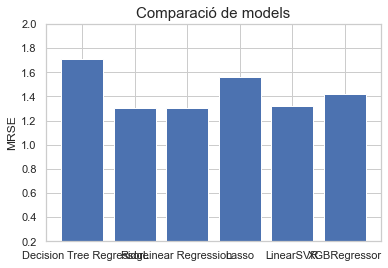

In [52]:
x_alc = x[['goout', 'Dalc', 'Walc']]
scores = []
for name, clf in zip(names, clf_list):
    print(name, end=': ')
    notes = abs(cross_val_score(clf, x_alc, y, cv=kf, scoring='neg_root_mean_squared_error'))
    print('MRSE: ', notes.mean()/2)
    print('Desviació estàndard: ', np.std(notes)/2, '\n')
    scores.append(notes.mean()/2)

x_pos = [i for i, _ in enumerate (names)]
plt.bar(x_pos, scores)
plt.ylabel('MRSE')
plt.title('Comparació de models', fontsize=15)
plt.xticks(x_pos, names)
plt.ylim([0.2, 2])
plt.show()

x_notAlcNotG1G2 = x.drop(columns=['goout', 'Walc', 'Dalc', 'G1', 'G2'])
scores = []
for name, clf in zip(names, clf_list):
    print(name, end=': ')
    notes = abs(cross_val_score(clf, x_notAlcNotG1G2, y, cv=kf, scoring='neg_root_mean_squared_error'))
    print('MRSE: ', notes.mean()/2)
    print('Desviació estàndard: ', np.std(notes)/2, '\n')
    scores.append(notes.mean()/2)

x_pos = [i for i, _ in enumerate (names)]
plt.bar(x_pos, scores)
plt.ylabel('MRSE')
plt.title('Comparació de models', fontsize=15)
plt.xticks(x_pos, names)
plt.ylim([0.2, 2])
plt.show()

## Conclusions

S'ha vist que utilitzant tots els atributs, la predicció de la nota final és relativament bona. El problema, però, és que part d'aquests atributs són les notes que ha anat treient durant el curs. 

Quan es treuen les notes i només es fa l'entrenament amb les dades que s'han aconseguit fent l'enquesta als alumnes, les prediccions són molt més dolentes. L'error és de += 1.3 de mitjana, significant que quan la nota és un 6, es podria predir des d'un 4.7 fins a un 7.3. 

També s'ha pogut veure que els atributs amb dades relacionaes amb el consum d'alcohol aporten molt poca informació. S'aconsegueix el mateix resultat utilitzant-los i no utilitzant-los.

Cal dir que el dataset amb el que es treballa té molt poques mostres i totes d'un mateix poble. És molt probable que si es tingués informació d'una regió més gran i més quantitat, les prediccions podríen millorar. Segurament també es podria trobar algun patró significatiu entre el consum d'alcohol i el rendiment escolar.